In [1]:
from src.comp_analysis import *
plt.style.use('properties.mplstyle')

In [3]:
# remove ising files empty and create comparative files don't empty
clean_files()

In [2]:
file = "../Results/swendsen_wang/Comparative/correlation/Pij_exp_ising_data_synteticN20_err_j_1.00e-01_err_h_1.00e-01_mteq_150_mrelx_2.dat"
A = load_data(file)

for prop, values in A[1].items():
    for key in values:  # 'exp' e 'ising'
        series = values[key]
        if series.isna().any():
            print(f"⚠️  NaN found in '{prop}' → '{key}'")

    

In [2]:
#load_data -> without mteq and mrelx
#load_data2 -> with mteq and mrelx
if __name__ == "__main__":
    arquivo_selecionado = select_file()
    if arquivo_selecionado:
        props, all_data = load_data(arquivo_selecionado)
        plotting_graphs(props, all_data)
    else:
        print("Nenhum arquivo foi selecionado.")

ValueError: Input contains NaN.

<Figure size 1600x900 with 0 Axes>

In [30]:
h_synt = pd.read_csv("../tests/synthetic/hi/h_synteticN20.dat", sep=' ')
h_real = pd.read_csv("../Results/exact/SeparateData/hi/hi_data_synteticN20_err_j_1.00e-05_err_h_1.00e-04_mteq_150_mrelx_2.dat", sep=' ')
h_s = h_synt["h_i"]
h_m = h_real["h_i"]
plt.plot(h_s, h_m, 'o')
plt.plot(h_s, h_s)
plt.xlabel("$h_{real}$")
plt.ylabel("$h_{exact}$")
plt.show()

EmptyDataError: No columns to parse from file

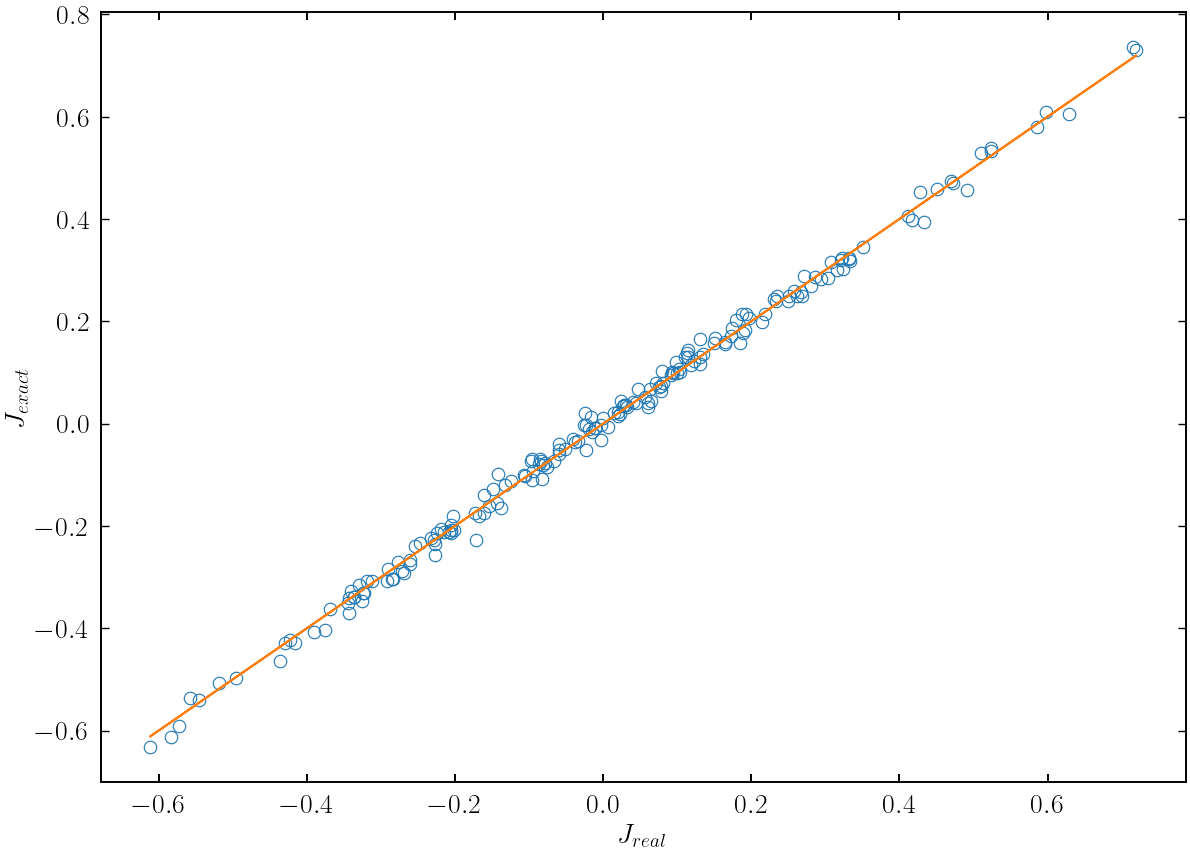

In [4]:
J_synt = pd.read_csv("../tests/synthetic/Jij/J_synteticN20.dat", sep=' ')
J_real = pd.read_csv("../Results/exact/SeparateData/Jij/Jij_data_synteticN20data_synteticN20_err_j_1.00e-05_err_h_1.00e-04_mteq_150_mrelx_2.dat", sep=' ')
J_s = J_synt["J_ij"]
J_m = J_real["J_ij"]
plt.plot(J_s, J_m, 'o')
plt.plot(J_s, J_s)
plt.xlabel("$J_{real}$")
plt.ylabel("$J_{exact}$")
plt.show()

In [2]:
df_props_RMSE = RMSE_properties()
results_sorted= minimum_teq(df_props_RMSE)

In [7]:
9000/30, 270/30

(300.0, 9.0)

In [4]:
min_rmse_per_property = results_sorted.loc[results_sorted.groupby('propertie')['RMSE'].idxmin()].reset_index(drop=True)
min_rmse_per_property

,propertie,sample,min_j,min_h,teq,relx,nspins,RMSE
0,correlation,sampleCarmona,9.94e-04,9.94e-04,6000,60,30,1.03e-02
1,covariance,sampleCarmona,9.96e-04,9.96e-04,6000,60,30,1.09e-02
2,magnetization,sampleCarmona,9.98e-04,9.98e-04,7500,60,30,1.10e-01
3,sisj,sampleCarmona,9.96e-04,9.96e-04,9000,60,30,1.17e-02
4,sisjsk,sampleCarmona,1.00e-03,1.00e-03,7500,270,30,1.01e-01
5,triplet,sampleCarmona,9.94e-04,9.94e-04,9000,60,30,1.13e-01


In [ ]:
props = results_sorted["propertie"].unique()
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange", "#380282"]

plt.figure(figsize=(14,6))
for p in range(len(props)): 
    df_filter = results_sorted[results_sorted["propertie"]==props[p]]
    plt.plot(df_filter["teq"],df_filter["RMSE"],'o',color=colors[p], label=props[p])

#plt.yscale("log")
plt.legend(prop={"size":12}, fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(1, .5))
plt.show()

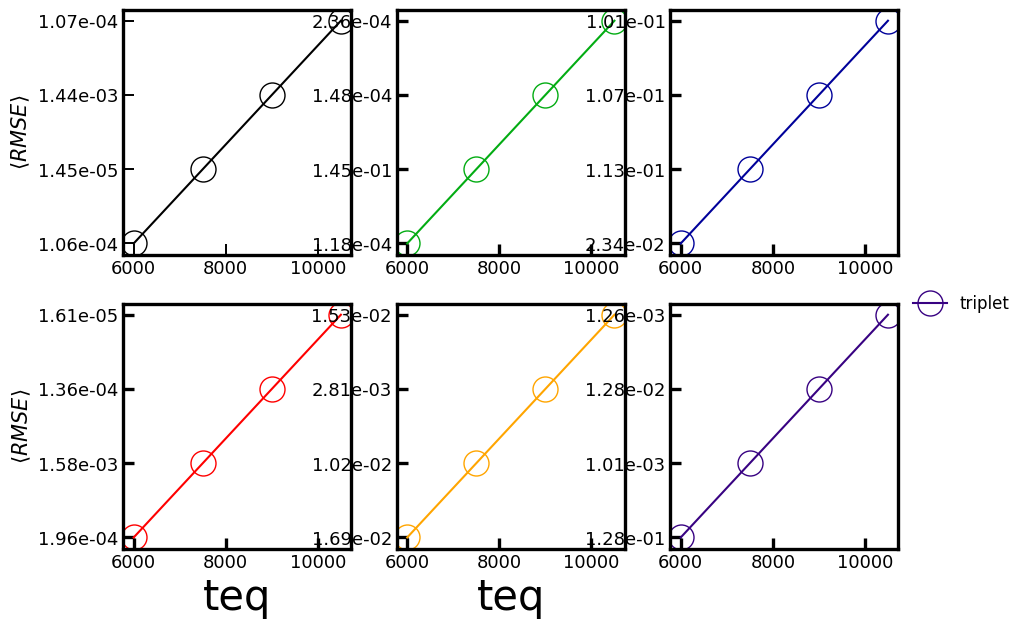

In [10]:

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, ax = plt.subplots(2,3,figsize=(10, 7))
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange", "#380282"]
linestyles = ['-', '-', '-', '-','-']
markers = ['o', 'v', 's', '^', 'D', "*"]

markersize = 18
thickness_axes = 1.4

props = results_sorted["propertie"].unique()


ax_all = [(j, i) for j in range(2) for i in range(3)]
p = 0

df_filter_1, df_filter_2, df_filter_3, df_filter_4, df_filter_5, df_filter_6 = results_sorted[results_sorted["propertie"]==props[0]], results_sorted[results_sorted["propertie"]==props[1]], results_sorted[results_sorted["propertie"]==props[2]], results_sorted[results_sorted["propertie"]==props[3]], results_sorted[results_sorted["propertie"]==props[4]], results_sorted[results_sorted["propertie"]==props[5]]

ax[0, 0].plot(df_filter_1["teq"],df_filter_1["RMSE"],
    linestyle='-', color=colors[0], marker='o', markeredgecolor=colors[0], label=props[0],
    markersize=markersize, markerfacecolor='none')

ax[0, 1].plot(df_filter_2["teq"],df_filter_2["RMSE"],
    linestyle='-', color=colors[1], marker='o', markeredgecolor=colors[1], label=props[1],
    markersize=markersize, markerfacecolor='none')

ax[0, 2].plot(df_filter_3["teq"],df_filter_3["RMSE"],
    linestyle='-', color=colors[2], marker='o', markeredgecolor=colors[2], label=props[2],
    markersize=markersize, markerfacecolor='none')

ax[1, 0].plot(df_filter_4["teq"],df_filter_4["RMSE"],
    linestyle='-', color=colors[3], marker='o', markeredgecolor=colors[3], label=props[3],
    markersize=markersize, markerfacecolor='none')    

ax[1, 1].plot(df_filter_5["teq"],df_filter_5["RMSE"],
    linestyle='-', color=colors[4], marker='o', markeredgecolor=colors[4], label=props[4],
    markersize=markersize, markerfacecolor='none') 

ax[1, 2].plot(df_filter_6["teq"],df_filter_6["RMSE"],
    linestyle='-', color=colors[5], marker='o', markeredgecolor=colors[5], label=props[5],
    markersize=markersize, markerfacecolor='none') 
for (j, i) in ax_all:
    # ax[j, i].tick_params('both', labelsize=13)
    # ax[j, i].xaxis.set_major_locator(MultipleLocator(1))
    # ax[j, i].xaxis.set_major_formatter('{x:.0f}')
    #ax[j, i].xaxis.set_minor_locator(MultipleLocator(.5))

    # Set legend and other parameters
    #ax[j, i].legend(prop={"size":21}, fancybox=True, framealpha=0.0)
    ax[j, i].tick_params(which='major', width=thickness_axes, length=8, direction="in", labelsize=13)

    # Set thickness for spines
    thickness_axes = 2.4
    for spine in ax[j, i].spines.values():
        spine.set_linewidth(thickness_axes)
    
ax[0,0].set_ylabel(r"$\langle RMSE \rangle $", size=15)
ax[1,0].set_ylabel(r"$\langle RMSE \rangle $", size=15)

ax[1,0].set_xlabel(r"teq", size=30)
ax[1,1].set_xlabel(r"teq", size=30)

plt.legend(prop={"size":12}, fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(1, 1))
plt.show()
